#  Unit 2.4b Using Programs with Data, SQL
> Using Programs with Data is focused on SQL and database actions.  Part B focuses on learning SQL commands, connections, and curses using an Imperative programming style,
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 26

# Database Programming is Program with Data
> Each Tri 2 Final Project should be an example of a Program with Data. 

>  Prepare to use SQLite in common Imperative Technique
- Explore [SQLite Connect object](https://www.tutorialspoint.com/python_data_access/python_sqlite_establishing_connection.htm) to establish database connection
- Explore [SQLite Cursor Object](https://www.tutorialspoint.com/python_data_access/python_sqlite_cursor_object.htm) to fetch data from a table within a database


## Schema of Users table in Sqlite.db
> Uses PRAGMA statement to read schema.

Describe Schema, here is resource [Resource](https://www.sqlite.org/index.html)
What is a database schema? A database schema defines the structure of a database, including the tables, columns, relationships, constraints, and other objects that make up the database. It specifies how the data is organized in the database.

What is the purpose of identity Column in SQL database? An identity column is a column in a SQL database that automatically generates a unique value for each new row that is added to a table. It is commonly used as a primary key for the table and helps to ensure that each row in the table has a unique identifier.

What is the purpose of a primary key in SQL database? A primary key is a column or set of columns in a SQL database that uniquely identifies each row in a table. It is used to enforce data integrity, ensure that each row in the table is unique, and to help optimize database performance.

What are the Data Types in SQL table? Data types in SQL tables define the type of data that can be stored in each column of a table. Common data types include integers, strings, dates, booleans, and floating point numbers, as well as more specialized types such as binary data, XML data, and spatial data. Different database management systems may support different sets of data types.






In [1]:
import sqlite3

database = 'instance/sqlite.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Fetch results of Schema
    results = cursor.execute("PRAGMA table_info('users')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close()
    
schema()


(0, 'id', 'INTEGER', 1, None, 1)
(1, '_name', 'VARCHAR(255)', 1, None, 0)
(2, '_uid', 'VARCHAR(255)', 1, None, 0)
(3, '_password', 'VARCHAR(255)', 1, None, 0)
(4, '_dob', 'DATE', 0, None, 0)


## Reading Users table in Sqlite.db
> Uses SQL SELECT statement to read data

- What is a connection object?  After you google it, what do you think it does?-**A connection object is used to establish a connection with a database, authenticate the user, and provide a way to interact with the database.**

- Same for cursor object?-**A cursor object is used to fetch data from the database, execute SQL statements, and manage transactions.**


- Look at conn object and cursor object in VSCode debugger.  What attributes are in the object?-The attributes in the connection and cursor objects depend on the specific database library being used, and can include details such as the server address, username, password, database name, and port number.- **The attributes in the connection and cursor objects depend on the specific database library being used, and can include details such as the server address, username, password, database name, and port number.**

- Is "results" an object?  How do you know?
**It's impossible to say for sure whether "results" is an object without more context, but it's possible that it could refer to an object that holds the results of a database query.**



In [5]:
import sqlite3

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM users').fetchall()

    # Print the results
    if len(results) == 0:
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
read()


(1, 'Thomas Edison', 'toby', 'sha256$fbdDZ2Cn0E9d1r2P$8fc0cae8e51b0d33c0bc893ab7efcfafa30896e5a28713385e8898a327aa4d2d', '1847-02-11')
(2, 'Nikola Tesla', 'niko', 'sha256$HdrGTjSDKzlukDIK$5cd17e3cbdedfbe589b8b0a4c1cc82bc87e53925d74f22d87b9142a945db6574', '2023-03-15')
(3, 'Alexander Graham Bell', 'lex', 'sha256$Uij5w6Zxtud7jgp0$52c4beba02c7f75a88f73147d9dc74edcdd811cd2127a970f8053e2944627378', '2023-03-15')
(4, 'Eli Whitney', 'whit', 'sha256$LzvP4WFummtJnwUM$897d8d864d191271524410dbcb7e8a82170848bfb52d166b5a9b39d0e04825e2', '2023-03-15')
(5, 'Indiana Jones', 'indi', 'sha256$d9pB1JiVDAk9H0RK$f67bd0a83bb24d6229fcd0d3ecc298a93f23c810528ee4c4e04adfba4d000fea', '1920-10-21')
(6, 'Marion Ravenwood', 'raven', 'sha256$b5WKICIleK8U5cpn$28c993e9bc13dc3beda004dd0477f28ddf529f9d9652d67655f6880151e25a51', '1921-10-21')


## Create a new User in table in Sqlite.db
> Uses SQL INSERT to add row
-  Compore create() in both SQL lessons.  What is better or worse in the two implementations?
**The create() method is used to insert new data into a database table in both SQL lessons. In the first lesson, the create() method uses string formatting to generate an SQL INSERT statement, while the second lesson uses parameterized queries. Both implementations have their pros and cons, with the second implementation being more secure against SQL injection attacks.**
-  Explain purpose of SQL INSERT.   Is this the same as User __init__?
**The purpose of SQL INSERT is to add new data to a database table. It is similar in purpose to the __init__ method in Python's User class, which is used to initialize a new instance of the class with data. However, the SQL INSERT statement operates directly on the database table, while the __init__ method operates on a Python object in memory.**









In [7]:
import sqlite3

def create():
    name = input("Enter your name:")
    uid = input("Enter your user id:")
    password = input("Enter your password")
    dob = input("Enter your date of birth 'YYYY-MM-DD'")
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO users (_name, _uid, _password, _dob) VALUES (?, ?, ?, ?)", (name, uid, password, dob))
        
        # Commit the changes to the database
        conn.commit()
        print(f"A new user record {uid} has been created")
                
    except sqlite3.Error as error:
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
create()

A new user record jagman has been created


## Updating a User in table in Sqlite.db
> Uses SQL UPDATE to modify password
- What does the hacked part do?
**The code is updating a user's password in an SQLite database by using an SQL UPDATE statement. The "hacked" part of the code is a simulated attack that tries to inject a SQL command into the password field. This is done to demonstrate the**
- Explain try/except, when would except occur?
**The try/except block is used to handle exceptions that may occur during the execution of the code. If an exception occurs within the try block, the code in the except block is executed. In this case, the except block is used to handle any exceptions related to the SQLite database, such as errors related to opening or closing the database connection.**
-What code seems to be repeated in each of these examples to point, why is it repeated?
**The code that is repeated in each of the examples is the code to establish a connection to the SQLite database and create a cursor object to execute SQL commands. This code is repeated because it is necessary to establish a connection and cursor object in order to interact with the database.**

In [ ]:
import sqlite3

def update():
    uid = input("Enter user id to update")
    password = input("Enter updated password")
    if len(password) < 2:
        message = "hacked"
        password = 'gothackednewpassword123'
    else:
        message = "successfully updated"

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to update data in a table
        cursor.execute("UPDATE users SET _password = ? WHERE _uid = ?", (password, uid))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            print(f"The row with user id {uid} the password has been {message}")
            conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the UPDATE:", error)
        
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#update()


## Delete a User in table in Sqlite.db
> Uses a delete function to remove a user based on a user input of the id.

- Is DELETE a dangerous operation?  Why?
**Deleting a user in an SQLite database involves using a DELETE statement to remove a row from the table based on the user ID. The delete_user function takes the user ID as an input parameter and executes the DELETE statement using a cursor object.**
- In the print statemements, what is the "f" and what does {uid} do?
**The "f" in the print statement is used to indicate an f-string, which is a Python 3.6+ feature that allows for string interpolation using curly braces {}. In this case, {uid} is an f-string expression that evaluates to the value of the uid variable, which is passed into the function as an argument. This allows the function to print the ID of the user that was deleted.**

In [ ]:
import sqlite3

def delete():
    uid = input("Enter user id to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM users WHERE _uid = ?", (uid,))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with uid {uid} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#delete()

# Menu Interface to CRUD operations
> CRUD and Schema interactions from one location by running menu. Observe input at the top of VSCode, observe output underneath code cell.
- Why does the menu repeat?
**The menu repeats because it is implemented within a while loop, which continues running until the user enters "q" to quit. This allows the user to perform multiple operations without having to restart the program.**
- Could you refactor this menu?  Make it work with a List?
**Yes, it would be possible to refactor this menu to work with a list of menu options instead of individual variables for each option. This could make the code more concise and easier to modify in the future. One possible implementation would be to use a list of tuples, where each tuple contains the menu option number and a string description of the option. The user input could then be used to index into the list to retrieve the corresponding option.**

In [10]:
# Menu, to run other cells from one control point
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c':
        create()
    elif operation.lower() == 'r':
        read()
    elif operation.lower() == 'u':
        update()
    elif operation.lower() == 'd':
        delete()
    elif operation.lower() == 's':
        schema()
    elif len(operation)==0: # Escape Key
        return
    else:
        print("Please enter c, r, u, or d") 
    menu() # recursion, repeat menu
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")


(1, 'Thomas Edison', 'toby', 'sha256$fbdDZ2Cn0E9d1r2P$8fc0cae8e51b0d33c0bc893ab7efcfafa30896e5a28713385e8898a327aa4d2d', '1847-02-11')
(2, 'Nikola Tesla', 'niko', 'sha256$HdrGTjSDKzlukDIK$5cd17e3cbdedfbe589b8b0a4c1cc82bc87e53925d74f22d87b9142a945db6574', '2023-03-15')
(3, 'Alexander Graham Bell', 'lex', 'sha256$Uij5w6Zxtud7jgp0$52c4beba02c7f75a88f73147d9dc74edcdd811cd2127a970f8053e2944627378', '2023-03-15')
(4, 'Eli Whitney', 'whit', 'sha256$LzvP4WFummtJnwUM$897d8d864d191271524410dbcb7e8a82170848bfb52d166b5a9b39d0e04825e2', '2023-03-15')
(5, 'Indiana Jones', 'indi', 'sha256$d9pB1JiVDAk9H0RK$f67bd0a83bb24d6229fcd0d3ecc298a93f23c810528ee4c4e04adfba4d000fea', '1920-10-21')
(6, 'Marion Ravenwood', 'raven', 'sha256$b5WKICIleK8U5cpn$28c993e9bc13dc3beda004dd0477f28ddf529f9d9652d67655f6880151e25a51', '1921-10-21')
(7, 'Jagman', 'jag', 'dasf', '2003-11')
(8, 'Jagger', 'jagman', '12345', '2004-09-18')
(9, 'jagger', 'gg', 'as', '200-1-1')


# Hacks
- Add this Blog to you own Blogging site.  In the Blog add notes and observations on each code cell.
- In this implementation, do you see procedural abstraction?
- In 2.4a or 2.4b lecture
    - Do you see data abstraction?  Complement this with Debugging example.
    - Use Imperative or OOP style to Create a new Table or do something that applies to your CPT project.
    

Reference... [sqlite documentation](https://www.sqlitetutorial.net/sqlite-python/creating-tables/)


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

def create_watchlist_with_graph(stocks, period="1mo"):
    """
    Creates a watchlist of stocks, checks their daily performance, and displays a graph of historical data.
    
    Args:
        stocks (list): A list of stock symbols (e.g., ["AAPL", "MSFT", "GOOGL"]).
        period (str): The time period for which to fetch historical data (default: "1mo").
    """
    watchlist_data = {}
    
    # Fetch historical data for each stock in the watchlist
    for stock_symbol in stocks:
        stock = yf.Ticker(stock_symbol)
        stock_data = stock.history(period=period)
        
        # Get the closing prices
        close_prices = stock_data["Close"]
        
        # Add the stock and its closing prices to the watchlist dictionary
        watchlist_data[stock_symbol] = close_prices
    
    # Print the watchlist
    print("---- Watchlist ----")
    for stock_symbol, close_prices in watchlist_data.items():
        print(f"{stock_symbol}: {close_prices.iloc[-1]}")
        
        # Plot the historical data
        plt.figure()
        plt.plot(close_prices)
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.title(f"{stock_symbol} Historical Data ({period})")
        plt.grid(True)
        plt.show()


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

def create_watchlist_with_graph(stocks, period="1mo"):
    """
    Creates a watchlist of stocks, checks their daily performance, and displays a graph of historical data.
    
    Args:
        stocks (list): A list of stock symbols (e.g., ["AAPL", "MSFT", "GOOGL"]).
        period (str): The time period for which to fetch historical data (default: "1mo").
    """
    watchlist_data = {}
    
    # Fetch historical data for each stock in the watchlist
    for stock_symbol in stocks:
        stock = yf.Ticker(stock_symbol)
        stock_data = stock.history(period=period)
        
        # Get the closing prices
        close_prices = stock_data["Close"]
        
        # Add the stock and its closing prices to the watchlist dictionary
        watchlist_data[stock_symbol] = close_prices
    
    # Print the watchlist
    print("---- Watchlist ----")
    for stock_symbol, close_prices in watchlist_data.items():
        print(f"{stock_symbol}: {close_prices.iloc[-1]}")
        
        # Plot the historical data
        plt.plot(close_prices)
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.title(f"{stock_symbol} Historical Data ({period})")
        plt.grid(True)
        plt.show()


---- Watchlist ----
AAPL: 172.2050018310547


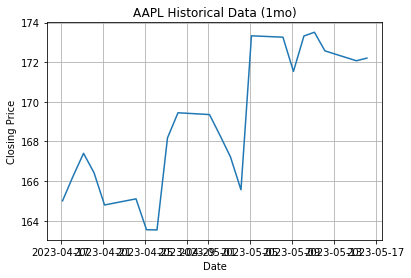

MSFT: 312.67999267578125


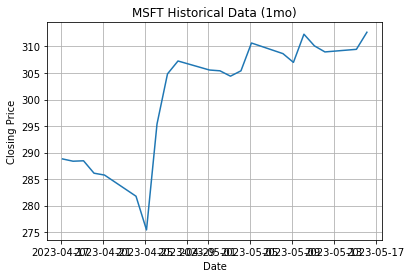

GOOGL: 120.09989929199219


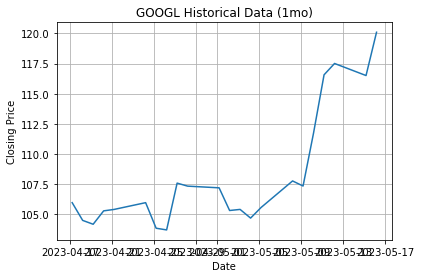

In [5]:
# Example usage
watchlist = ["AAPL", "MSFT", "GOOGL"]

create_watchlist_with_graph(watchlist, period="1mo")
